## Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

<img src="https://images.unsplash.com/photo-1527847263472-aa5338d178b8?q=80&w=2074&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" alt="Farmer in a field" width="900"/>

Photo by [Jed Owen](https://unsplash.com/@jediahowen) on [Unsplash](https://unsplash.com).

<br>

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

### The Data 

DataCamp published a `soil_measures.csv` dataset to use. A summary and preview are provided below.

-	Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

#### `soil_measures.csv` 

| Column   | Description                                                        |
|----------|--------------------------------------------------------------------|
| `"N"`    | Nitrogen content ratio in the soil              					|
| `"P"`    | Phosphorous content ratio in the soil                              |
| `"K"`    | Potassium content ratio in the soil                           		|
| `"pH"`   | PH value of the soil                                				|
| `"crop"` | categorical values that contain various crops (target variable).   |

This data can be used to predict the best crop for a farmer's field. 

### Modeling Plan

I will:

-	**drop** (remove) missing observations accounting for less than **5%** of all data.

-	**split** data into training and test sets

-	build a **pipeline** for merging the **imputing**, **scaling**, and **modeling** operations into single workflow

-	investigate the **best predictive feature** (I'll use accuracy as the performance metric)

-	train a model on some soil measurements, and then investigate what accuracy it has for **optimizing crop selection** 

### Results 

-	`'K'` (Potassium) has the best accuracy score.

-	Our model has an accuracy score of about **68%** in selecting the best crop, given some soil measurements such as Potassium, Phosphorous, and Nitrogen content ratios and the PH value of the soil.

In [35]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [36]:
crops = pd.read_csv("soil_measures.csv")
crops.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


#### Handling missing data

1. A common approach is to **drop** (remove) missing observations accounting for less than **5%** of all data.

In [37]:
# the data used in this notebook doesn't contains any missing values, 
# but I'm doing this for an educational purpose
cols_to_drop = crops.columns[crops.isna().sum() <= 0.05 * crops.shape[0]]
crops.dropna(subset=cols_to_drop, inplace=True)

2. **split** data

In [38]:
X = crops.drop(columns=['crop']).values
y = crops['crop'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

3. Finally, we can **impute** other missing data

Let's add the imputing process to the **scaling** and **modeling** operations in a single workflow using a pipeline

-	It's generally best to scale data so that all features have similar ranges (avoiding bias introduced because different ranges)

In [39]:
steps = [
	('imp_mean', SimpleImputer(strategy='mean')),
	('scaler', StandardScaler()),
	('log_regressor', LogisticRegression())
]
pipeline = Pipeline(steps)

### Selecting the best predictive feature

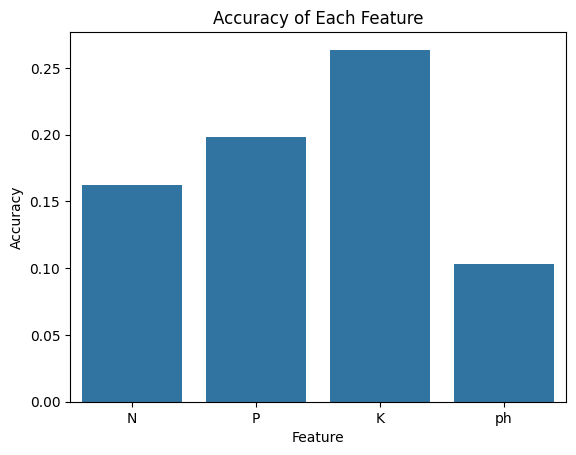

In [42]:
feature_names = crops.drop(columns=['crop']).columns
feature_performance = {}

for idx, name in enumerate(feature_names):
    pipeline.fit(X_train[:, idx].reshape(-1, 1), y_train)
    feature_performance[name] = pipeline.score(X_test[:, idx].reshape(-1, 1), y_test)
    
sns.barplot(x=feature_names, y=feature_performance.values())
plt.xlabel("Feature")
plt.ylabel("Accuracy")
plt.title("Accuracy of Each Feature")
plt.show()

# 'K' has the best accuracy score
best_predictive_feature = {'K': feature_performance['K']}

### Optimizing Crop Selection 

In [41]:
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)
# This model has an accuracy score of about 68% in selecting the best crop, 
# given some soil measurements such as Potassium, Phosphorous, and Nitrogen content ratios and the PH value of the soil

0.6803030303030303